# Identity and Inclusion Team - Exploratory Data Analysis

**By Susan Burtner, Giorgina Paiella, and Jamal Russell**

This Jupyter notebook is a summary of last year's work on the Identify and Inclusion Team that was finalized during the summer research camp (now Team 3.) This first part of this tutorial is an adaptation of the Word2Vec tutorial given by Geography PhD Bo Yan in May 2018. The second part of this tutorial borrows heavily from the authors of **gensim**, which is a program that was used to create the word embeddings. Their code can be found on their GitHub at https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Corpora_and_Vector_Spaces.ipynb. 


### Using word embeddings to analyze word similarity among university mission statements

The goal of this Jupyter notebook is to:

1) Gain familiarity with word embeddings (bag-of-words vs. skip-gram) <br>
2) Create our own corpus of special interest university/college mission statements <br>
3) Use Word2Vec to create word embeddings and inform value statements from meaningful clusters <br>
4) Use Doc2Vec to compare individual mission statements


## PART 1 - Tutorial

### Go through an example for a pre-trained model

In [10]:
#@title Default title text
# Only needs to be run once at the top of the notebook
!pip3 install spacy
!pip3 install numpy
!pip3 install csv
!pip3 install sklearn
!pip3 install matplotlib

     |████████████████████████████████| 826.9MB 3.1MB/s eta 0:00:01     |████████████▋                   | 326.4MB 681kB/s eta 0:12:15
  Stored in directory: /private/var/folders/dq/xm60k2297w91dqrvmcxptc8w0000gn/T/pip-ephem-wheel-cache-4qj4rai3/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
  ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [15]:
# This is the English language model used by spacy, but honestly isn't necessary
!python3 -m spacy download en_core_web_lg

     |████████████████████████████████| 11.1MB 672kB/s eta 0:00:01
  Stored in directory: /private/var/folders/dq/xm60k2297w91dqrvmcxptc8w0000gn/T/pip-ephem-wheel-cache-bzax1eue/wheels/39/ea/3b/507f7df78be8631a7a3d7090962194cf55bc1158572c0be77f
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
# Import packages
import spacy
from spacy.lang.en.examples import sentences
import numpy as np
import csv
from sklearn.manifold import TSNE
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [2]:
# Load the English model
# This is a pre-trained model, we need to create our own model later
# This may take a while

nlp = spacy.load('en_core_web_lg')

In [3]:
# This section is from the original tutorial. It confirms that all of the packages
# and model have been loaded correctly.

# Analyze the vectorized tokens
cat = nlp.vocab['cat']
dog = nlp.vocab['dog']
car = nlp.vocab['car']

# Print the vector length and values for 'cat'
print('vector length:', len(cat.vector))
print('cat:', cat.vector[1:100]) # I don't really want to print all of it, because it has 300 values. Why?

vector length: 300
cat: [-0.024468  -0.23368   -0.23378   -0.18382    0.32711   -0.22084
 -0.28777    0.12759    1.1656    -0.64163   -0.098455  -0.62397
  0.010431  -0.25653    0.31799    0.037779   1.1904    -0.17714
 -0.2595    -0.31461    0.038825  -0.15713   -0.13484    0.36936
 -0.30562   -0.40619   -0.38965    0.3686     0.013963  -0.6895
  0.004066  -0.1367     0.32564    0.24688   -0.14011    0.53889
 -0.80441   -0.1777    -0.12922    0.16303    0.14917   -0.068429
 -0.33922    0.18495   -0.082544  -0.46892    0.39581   -0.13742
 -0.35132    0.22223   -0.144     -0.048287   0.3379    -0.31916
  0.20526    0.098624  -0.23877    0.045338   0.43941    0.030385
 -0.013821  -0.093273  -0.18178    0.19438   -0.3782     0.70144
  0.16236    0.0059111  0.024898  -0.13613   -0.11425   -0.31598
 -0.14209    0.028194   0.5419    -0.42413   -0.599      0.24976
 -0.27003    0.14964    0.29287   -0.31281    0.16543   -0.21045
 -0.4408     1.2174     0.51236    0.56209    0.14131    0.092514

In [4]:
# Function to compute cosine similarity
cosine = lambda v1, v2: np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

The Word2Vec model does not provide vector representations for sentences or documents. How is the similarity between sentences computed? Since sentences are composed of words, an easy way to obtain the vector representations of sentences is by averaging the vectors of each word in the sentence.

I use the following sentences to illustrate this example.

s1 = "Dogs are beautiful animals." <br>
s2 = "Some gorgeous creatures are canines." <br>
s3 = "Seals are sea puppies." <br>

In [5]:
s1 = (nlp.vocab['Dogs'].vector + nlp.vocab['are'].vector + nlp.vocab['beautiful'].vector + \
  nlp.vocab['animals'].vector + nlp.vocab['.'].vector)/5
s2 = (nlp.vocab['Some'].vector + nlp.vocab['gorgeous'].vector + nlp.vocab['creatures'].vector + \
  nlp.vocab['are'].vector + nlp.vocab['canines'].vector + nlp.vocab['.'].vector)/5
s3 = (nlp.vocab['Seals'].vector + nlp.vocab['are'].vector + nlp.vocab['sea'].vector + \
      nlp.vocab['puppies'].vector + nlp.vocab['.'].vector)/4

# Note dividing by 5 and 4? Why?

print("The similarity between sentence one and two is: " + str(cosine(s1, s2)))
print("The similarity between sentence one and three is: " + str(cosine(s1, s3)))

# Keep in mind, the vectors were determined by the nlp model that was already pre-trained.

The similarity between sentence one and two is: 0.9008987
The similarity between sentence one and three is: 0.8250619


### Document level similarity

Since documents are composed of sentences which are composed of words, one way to obtain vector representations for entire documents is to calculate the average vectors of words in each sentence.

In [6]:
# Again, this is borrowed directly from the tutorial

target = nlp("Cats are beautiful animals.")  # text about cats

doc1 = nlp("Some gorgeous creatures are felines.")  # text about cats
doc2 = nlp("Dolphins are swimming mammals.")  # text about dolphins

print('Similarity between target and doc1:', target.similarity(doc1))
print('Similarity between target and doc1:', target.similarity(doc2))

Similarity between target and doc1: 0.9115828449161616
Similarity between target and doc1: 0.7822956256736615


### Word embeddings visualizations

Since the vectors have a high number of dimensions, we first need to reduce the number of dimensions so that the embeddings can be visualized. We use **t-SNE** to do this.

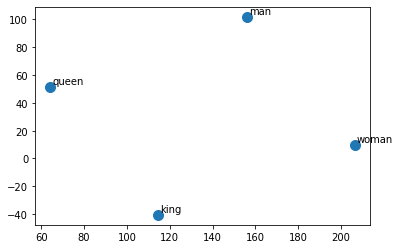

In [7]:
# Once more, this code is borrowed directly from the tutorial.
# It is worth going through to know how to format your own code.

# king is to man as what is to woman?
king = nlp.vocab['king']
queen = nlp.vocab['queen']
man = nlp.vocab['man']
woman = nlp.vocab['woman']

# Use t-SNE to do dimension reduction, from 300d to 2d
tsne_model = TSNE(n_components = 2)

# get transformed vectors
data = np.array([king.vector, man.vector, queen.vector, woman.vector])
data_2d = tsne_model.fit_transform(data)

labels = ['king', 'man', 'queen', 'woman']

# plot the 2d vectors and show their labels
plt.scatter(data_2d[:, 0], data_2d[:, 1], s=100)
for i, txt in enumerate(labels):
    plt.annotate(txt, (data_2d[i,0], data_2d[i,1]), xytext=(2, 3), textcoords='offset points')
plt.show()

In [8]:
# But remember, this is a 2D representation of a very high-dimensional vector!

print(man.vector[1:100])

[ 2.0663e-01  1.6543e-02 -3.1026e-01  1.9719e-02  2.7791e-01  1.2283e-01
 -2.6328e-01  1.2522e-01  3.1894e+00 -1.6291e-01 -8.8759e-02  3.3067e-03
 -2.9483e-03 -3.4398e-01  1.2779e-01 -9.4536e-02  4.3467e-01  4.9742e-01
  2.5068e-01 -2.0901e-01 -5.8931e-01  6.1615e-02  1.0434e-01  2.4424e-01
 -2.9120e-01  3.0746e-01  3.6276e-01  7.1151e-01 -8.0523e-02 -5.9524e-01
  3.4834e-01 -3.3048e-01  7.0316e-02  5.3329e-01 -2.9081e-01  1.3459e-01
 -3.9856e-01 -3.2435e-01  1.1867e-01 -1.4938e-01 -3.8256e-01  3.3116e-01
 -3.1488e-01 -9.4491e-02 -6.1319e-02  1.5518e-01 -2.5523e-01 -1.1813e-01
  2.5296e-01 -9.5174e-02 -1.6596e-01 -1.0840e-01  8.8803e-02  2.0890e-01
  4.3981e-01  1.0476e-03 -4.0666e-02  2.6487e-01 -6.1009e-01 -1.4405e-01
 -8.1185e-02  7.5475e-03  2.3373e-01 -2.7772e-02 -2.9315e-01 -1.1744e-01
 -8.3193e-02 -2.3768e-01  1.5735e-01 -5.6408e-01 -2.9323e-01  1.6387e-02
 -7.8160e-02 -2.1301e-01 -1.7845e-01 -3.0769e-01 -4.6203e-01 -2.5220e-03
  4.2973e-01 -4.5647e-02  4.3434e-01  2.9144e-01 -2

## PART 2 - Create our own corpus

If we treat each mission statement like a document, we can calculate the cosine similarity between each mission statement. But first, we need to create our corpus and our own model.

Another tutorial that helped me out immensely was: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial/comments. More citations to follow!


### Create a randomized sample of university mission statements 

Randomized university list:

| HSIs | Women's Colleges | Tribal Colleges | HBCUs |
| :--- | :--- | :--- | :--- |
| Colorado State University-Pueblo | Smith College | Tohono O'odham Community College | Tuskegee University |
| John F. Kennedy University | Bennett College | Nebraska Indian Community College | Rust College |
| Ventura College | Bryn Mawr College | College of Menominee Nation | Alabama A&M University |
| Coastline Community College | Hollins University | Navajo Technical University | Virginia University of Lynchburg |
| Napa Valley College | Brenau university | Blackfeet Community College | Bishop State Community College |

*Note*: This last has been updated by Jamal! There are too many to write them all out.

In [21]:
# Import necessary libraries
import os
import tempfile
import pandas
from gensim import corpora

#TEMP_FOLDER = tempfile.gettempdir()
#print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

In [2]:
# From the example, want our data in this format:

#documents = ["Human machine interface for lab abc computer applications",
#             "A survey of user opinion of computer system response time",
#             "The EPS user interface management system",
#             "System and human system engineering testing of EPS",              
#             "Relation of user perceived response time to error measurement",
#             "The generation of random binary unordered trees",
#             "The intersection graph of paths in trees",
#             "Graph minors IV Widths of trees and well quasi ordering",
#             "Graph minors A survey"]

raw_documents = pandas.read_csv("/Users/sburtner/Documents/WE1S/mission_statements_2.csv",
                            header = 0) # can add specific stop words later...

# Clean the documents a bit
documents = raw_documents.replace("\n", " ", regex = True).replace("\.", " ", regex = True).replace("\\xa0", " ", regex = True).replace(",", " ", regex = True).replace("\:", " ", regex = True)

# All mission statements
all_statements = documents["Mission_Statement"].tolist()
print(all_statements)

["Our Vision To establish Colorado State University-Pueblo as the people's university of the Southwest United States by 2028  Our Values  CSU-Pueblo is dedicated to interdisciplinary learning and entrepreneurship that elevates our people and our community  creates educational opportunities  fosters unique collaborations  and supports inclusion  access  and affordability as a gateway to the world   Our Mission  CSU-Pueblo’s success will be measured by the resilience  agility  and problem-solving abilities of our diverse student population and the ways in which our graduates are able to navigate work in a rapidly changing world   Guiding Principles Develop People CSU-Pueblo develops people who have meaningful lives and make significant contributions to their families  communities  and world  Transform Learning CSU-Pueblo creates new opportunities by reimagining academic experiences  Live Sustainably CSU-Pueblo dedicates resources and focus toward programs and policies that support sustai

In [29]:
# Create special stoplist consisting of school names, abbreviations, etc.
stoplist = pandas.read_csv("/Users/sburtner/Documents/WE1S/stopwords.txt", sep = " ", header = None, squeeze = True)
stoplist = set(stoplist.iloc[0])

# separated by ";" in file, so split by that character
spec_words = documents["Specific_Stop_Words"].str.lower().str.split("; ", n = 2, expand = True)
spec1 = set(spec_words[0])
spec2 = set(spec_words[1])
spec3 = set(spec_words[2])
spec_stoplist = spec1.union(spec2).union(spec3)
schools_stoplist = set(documents["School_Name"].str.lower())

#print(spec_stoplist)

stoplist = schools_stoplist.union(spec_stoplist)

#print(stoplist)

pronouns = set("he her hers herself him himself his our ours ourselves she \
    their theirs them themselves they they'd they'll they're they've value we we'd \
    we'll we're we've you you'd you'll you're you've your yours yourself yourselves".split())

#print(pronouns)

stoplist = stoplist - pronouns

print(stoplist)

#stoplist = set('for a of the and to in'.split()) # NEED TO REVISIT

{nan, 'mount holyoke', 'brenau university', 'university-pueblo', 'northwest indian college', 'j f  drake state technical college', 'college of menominee nation', 'nvc', 'rust college', 'pccc', 'los angeles valley college', 'stillman', 'spelman college', 'la sierra university', 'moore college of art & design', None, 'meredith', 'lac courte oreilles ojibwa community college', 'keweenaw bay ojibwa community college', 'southwestern college', 'united tribes technical college', 'vul', 'benedict college', 'tocc', 'dillard university', 'city colleges of chicago', 'mills college', 'navajo technical university', 'virginia university of lynchburg', 'smith college', 'cottey college', 'bishop state community college', 'nebraska indian community college', 'south plains college', 'ventura college', 'haskell', 'bakersfield college', 'albany state university', 'mount holyoke college', 'passaic county community college', 'blackfeet community college', 'napa valley college', 'hollins university', 'alabam

In [30]:
texts = [[word for word in statement.lower().split() if word not in stoplist]
         for statement in all_statements]

# Remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

from pprint import pprint  # pretty-printer
pprint(texts)

[['our',
  'vision',
  'to',
  'establish',
  'colorado',
  'state',
  'as',
  'the',
  'university',
  'of',
  'the',
  'southwest',
  'united',
  'states',
  'by',
  'our',
  'values',
  'is',
  'dedicated',
  'to',
  'interdisciplinary',
  'learning',
  'and',
  'entrepreneurship',
  'that',
  'elevates',
  'our',
  'people',
  'and',
  'our',
  'community',
  'creates',
  'educational',
  'opportunities',
  'fosters',
  'unique',
  'collaborations',
  'and',
  'supports',
  'inclusion',
  'access',
  'and',
  'as',
  'a',
  'to',
  'the',
  'world',
  'our',
  'mission',
  'success',
  'will',
  'be',
  'measured',
  'by',
  'the',
  'and',
  'problem-solving',
  'abilities',
  'of',
  'our',
  'diverse',
  'student',
  'population',
  'and',
  'the',
  'ways',
  'in',
  'which',
  'our',
  'graduates',
  'are',
  'able',
  'to',
  'work',
  'in',
  'a',
  'rapidly',
  'changing',
  'world',
  'guiding',
  'principles',
  'develop',
  'people',
  'develops',
  'people',
  'who',
  

  'and',
  'evolving',
  'campus',
  'student',
  'growth',
  'through',
  'innovative',
  'teaching',
  'and',
  'learning',
  'the',
  'college',
  'creates',
  'a',
  'learning-centered',
  'environment',
  'that',
  'offers',
  'a',
  'broad',
  'range',
  'of',
  'academic',
  'pathways',
  'and',
  'services',
  'in',
  'an',
  'atmosphere',
  'of',
  'academic',
  'freedom',
  'and',
  'collaboration',
  'response',
  'to',
  'students',
  'faculty',
  'staff',
  'and',
  'community',
  'this',
  'supports',
  'students’',
  'growth',
  'to',
  'fulfill',
  'their',
  'educational',
  'goals',
  'through',
  'innovative',
  'teaching',
  'and',
  'learning',
  'and',
  'environmental',
  'stewardship',
  'the',
  'college',
  'strives',
  'to',
  'be',
  'effective',
  'stewards',
  'of',
  'our',
  'physical',
  'technological',
  'and',
  'financial',
  'resources',
  'to',
  'maximize',
  'institutional',
  'effectiveness',
  'the',
  'college',
  'fosters',
  'sustainability

  'higher',
  'education',
  'to',
  'as',
  'many',
  'talented',
  'students',
  'as',
  'possible',
  'in',
  'an',
  'environment',
  'that',
  'respects',
  'builds',
  'community',
  'and',
  'encourages',
  'student',
  'success',
  'we',
  'resources',
  'to',
  'make',
  'our',
  'high-quality',
  'education',
  'as',
  'affordable',
  'as',
  'possible',
  'through',
  'a',
  'range',
  'of',
  'and',
  'financial',
  'aid',
  'programs',
  'we',
  'believe',
  'in',
  'the',
  'power',
  'of',
  'diversity',
  'to',
  'enrich',
  'our',
  'learning',
  'and',
  'our',
  'lives',
  'and',
  'we',
  'are',
  'committed',
  'to',
  'leading',
  'the',
  'to',
  'create',
  'an',
  'inclusive',
  'and',
  'just',
  'society',
  'we',
  'to',
  'be',
  'part',
  'of',
  'our',
  'unique',
  'community',
  'where',
  'everyone',
  'can',
  'out',
  'and',
  'fit',
  'in',
  'we',
  'are',
  'committed',
  'to',
  'equity',
  'years',
  'before',
  'it',
  'was',
  'the',
  'studen

  'meaningful',
  'employment',
  'basic',
  'skills',
  '–',
  'providing',
  'students',
  'with',
  'programs',
  'and',
  'courses',
  'that',
  'will',
  'increase',
  'their',
  'of',
  'academic',
  'success',
  'continuing',
  'education',
  '–',
  'providing',
  'the',
  'community',
  'with',
  'courses',
  'and',
  'programs',
  'that',
  'enrich',
  'community',
  'life',
  'and',
  'support',
  'education',
  'integrating',
  'blackfeet',
  'culture',
  'and',
  'language',
  '–',
  'providing',
  'programs',
  'and',
  'courses',
  'that',
  'sustain',
  'the',
  'past',
  'and',
  'promote',
  'the',
  'vitality',
  'of',
  'the',
  'blackfeet',
  'nation’s',
  'future'],
 ['university',
  'mission',
  'tuskegee',
  'university',
  'is',
  'a',
  'national',
  'independent',
  'and',
  'institution',
  'of',
  'higher',
  'learning',
  'that',
  'is',
  'located',
  'in',
  'the',
  'state',
  'of',
  'alabama',
  'the',
  'university',
  'has',
  'distinctive',
  'stren

  'of',
  'its',
  'students',
  'empowers',
  'the',
  'whole',
  'person',
  'to',
  'engage',
  'the',
  'many',
  'cultures',
  'of',
  'the',
  'world',
  'and',
  'inspires',
  'a',
  'commitment',
  'to',
  'positive',
  'social',
  'change'],
 ['college',
  'mission',
  'is',
  'a',
  'liberal',
  'arts',
  'institution',
  'that',
  'is',
  'committed',
  'to',
  'fostering',
  'academic',
  'excellence',
  'and',
  'to',
  'providing',
  'high',
  'quality',
  'educational',
  'opportunities',
  'for',
  'diverse',
  'populations',
  'with',
  'levels',
  'of',
  'academic',
  'preparation',
  'primarily',
  'a',
  'teaching',
  'institution',
  'has',
  'a',
  'proud',
  'and',
  'evolving',
  'tradition',
  'of',
  'preparing',
  'students',
  'for',
  'leadership',
  'and',
  'service',
  'in',
  'society',
  'is',
  'committed',
  'to',
  'service',
  'for',
  'the',
  'common',
  'good',
  'the',
  'entire',
  'academic',
  'enterprise',
  'with',
  'the',
  'principles'

### Create bag-of-words (NOT to be continued...)

To perform Doc2Vec, we need to create a vector representation for each document. From the tutorial...

> To convert documents to vectors, we’ll use a document representation called bag-of-words. In this representation, each document is represented by one vector where a vector element *i* represents the number of times the ith word appears in the document.

> It is advantageous to represent the questions only by their (integer) ids. The mapping between the questions and ids is called a dictionary:

In [15]:
#dictionary = corpora.Dictionary(texts)
#dictionary.save(os.path.join(TEMP_FOLDER, 'deerwester.dict'))  # store the dictionary, for future reference
#print(dictionary)

In [14]:
#print(dictionary.token2id)

{'abilities': 0, 'able': 1, 'academic': 2, 'access,': 3, 'accessible,': 4, 'across': 5, 'affordable,': 6, 'ahead': 7, 'all': 8, 'allow': 9, 'an': 10, 'any': 11, 'are': 12, 'as': 13, 'at': 14, 'attainment': 15, 'be': 16, 'become': 17, 'believe': 18, 'build': 19, 'building': 20, 'but': 21, 'by': 22, 'campus': 23, 'change': 24, 'changing': 25, 'citizens': 26, 'close': 27, 'collaboration': 28, 'collaborations,': 29, 'colorado': 30, 'come': 31, 'commitment': 32, 'communities': 33, 'communities,': 34, 'community,': 35, 'contributions': 36, 'create': 37, 'creates': 38, 'creativity': 39, 'csu-pueblo': 40, 'cultivate': 41, 'cultural,': 42, 'cultures,': 43, 'dedicated': 44, 'degree': 45, 'demand': 46, 'develop': 47, 'develops': 48, 'diverse': 49, 'earn': 50, 'economic': 51, 'economic,': 52, 'education': 53, 'educational': 54, 'educational,': 55, 'educators,': 56, 'elevate': 57, 'elevates': 58, 'embraces': 59, 'empower': 60, 'empowers': 61, 'engage': 62, 'entrepreneurship': 63, 'equip': 64, 'esta

### Create word embeddings through skip-gram architecture

Before we can do Doc2Vec, I would like to run Word2Vec on the entire corpus to figure out how much certain words are clustering in semantic space. Perhaps this can inform which words are even being used to promote certain values.

In [31]:
# Word2Vec
## For this example, we only need the columns in our raw data for the school name and the mission statement
from gensim.models.word2vec import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
print("Number of cores: " + str(cores))

w2v_model = Word2Vec(min_count = 2, # ignore words that show up fewer than 2 times
                     window = 2, # how far to the left and right to look from the target word
                     size = 300, # size of the destination vector
                     alpha = 0.025, # learning rate 
                     workers = cores - 1) # best practice

# Note, I don't use negative sampling, but I could!
#model = Word2Vec(texts)

# Build the vocabulary
w2v_model.build_vocab(texts)
print(w2v_model.wv.__getitem__("mission")) # example word to test that it worked

Number of cores: 8
[ 1.50271121e-03  1.51417789e-03 -9.03188018e-04  7.29434716e-04
  1.24384486e-03 -2.99595180e-04 -3.61958046e-05 -3.03294597e-04
  8.04343217e-05  1.50096207e-03  1.47340132e-03  6.46133965e-04
  3.82061087e-04  2.83423811e-04  1.25342642e-03 -1.06609915e-03
  7.06421444e-04 -1.46743807e-03 -1.35102565e-03  1.53720623e-03
 -8.48732365e-04 -1.34109124e-03  1.19933439e-03  6.21209561e-04
  1.11586135e-03 -1.83657030e-05  2.24773918e-04  1.04952685e-03
 -1.90393854e-04 -1.46771211e-03  1.30323030e-03  1.18314836e-03
 -5.14788611e-04 -7.17145274e-04 -2.45302450e-04  1.00631046e-03
 -7.12082430e-04 -4.78587754e-04 -1.60468346e-03 -1.49241521e-03
  1.57087960e-03 -4.27520223e-04 -4.90042730e-04 -1.31692650e-04
  8.43689661e-04 -3.87051376e-04 -1.09006558e-03 -9.32214665e-04
 -2.80915934e-04 -7.97166140e-04 -4.21688710e-05 -1.13326474e-03
  6.59214711e-05  1.19952555e-03 -1.12335685e-04 -1.34845759e-04
 -5.36994834e-04 -6.11448893e-04 -1.64237499e-04 -1.21315487e-03
 -6.88

In [32]:
# Train the model
w2v_model.train(texts, total_examples = w2v_model.corpus_count, epochs = 30, report_delay = 1)
w2v_model.init_sims(replace = True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


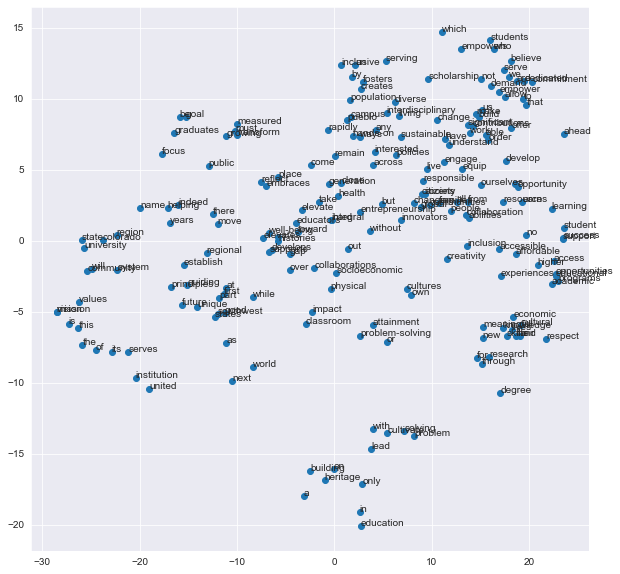

In [63]:
# Visualize the word embeddings with t-SNE
from matplotlib import pyplot
pyplot.figure(figsize = (10, 10))

# Use t-SNE to do dimension reduction, from 300D to 2D
tsne_model = TSNE(n_components = 2)

# Get transformed vectors
word_vectors = w2v_model[w2v_model.wv.vocab]
tSNE_res = tsne_model.fit_transform(word_vectors)[1:200]

# Create a scatter plot
pyplot.scatter(tSNE_res[:, 0], tSNE_res[:, 1])

words = list(w2v_model.wv.vocab)

for i, word in enumerate(words[1:200]):
    pyplot.annotate(word, xy = (tSNE_res[i, 0], tSNE_res[i, 1]))
pyplot.show()

In [58]:
# Explore the model!
# Find words most similar to "blank"
w2v_model.wv.most_similar(positive = ["emphasis"])

[('colleges', 0.9997758865356445),
 ('christian', 0.9997687339782715),
 ('offering', 0.9996923208236694),
 ('addition', 0.9996297359466553),
 ('throughout', 0.9996191263198853),
 ('humanities', 0.9996140599250793),
 ('form', 0.9996068477630615),
 ('women’s', 0.9995808005332947),
 ('founded', 0.9995722770690918),
 ('heritage', 0.9995636940002441)]

In [61]:
# Explore the model!
# Find words most similar to "blank"
w2v_model.wv.most_similar(positive = ["humanities"])

[('colleges', 0.9996553063392639),
 ('form', 0.9996148943901062),
 ('emphasis', 0.9996140599250793),
 ('scientific', 0.9996098279953003),
 ('careers', 0.9995999336242676),
 ('christian', 0.9995707869529724),
 ('addition', 0.9994975924491882),
 ('offering', 0.9994804859161377),
 ('independent', 0.9994285106658936),
 ('curriculum', 0.999427855014801)]

In [49]:
# Find similarity between two words
print(w2v_model.wv.similarity("science", "humanities"))

0.998353


In [62]:
# Examine analogies
w2v_model.wv.most_similar(positive = ["humanities"], negative = ["science"], topn = 10)

[('liberal', 0.32758647203445435),
 ('arts', 0.2207217663526535),
 ('sciences', 0.09905508160591125),
 ('program', 0.06694696098566055),
 ('undergraduate', 0.058052413165569305),
 ('visual', 0.05163887143135071),
 ('solid', 0.043821536004543304),
 ('curriculum', 0.03727545589208603),
 ('foundation', 0.03539593517780304),
 ('education', 0.03481941670179367)]

In [38]:
import seaborn as sns
sns.set_style("darkgrid")

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype = 'f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 10 dimensions with PCA
    #reduc = PCA(n_components = 10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress = True)
    
    #Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    Y = TSNE(n_components = 2, random_state = 0, perplexity = 15).fit_transform(arrays)

    
    # Sets everything up to plot
    df = pandas.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-5, Y[:, 0].max()+5)
    plt.ylim(Y[:, 1].min()-5, Y[:, 1].max()+5)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

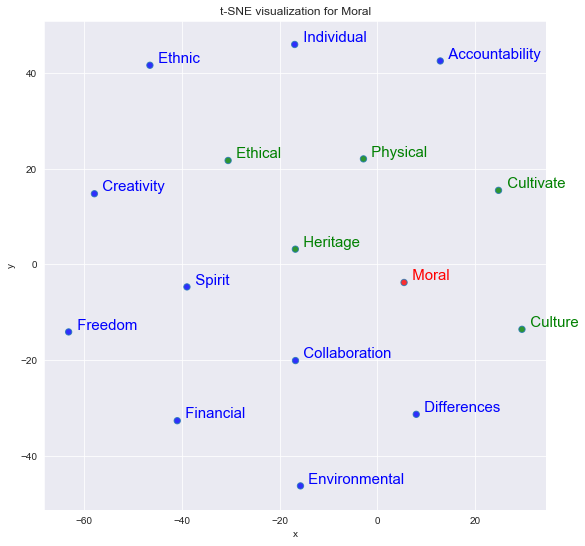

In [39]:
tsnescatterplot(w2v_model, 'moral', ['ethical', 'physical', 'cultivate', 'heritage', 'culture'])

# must come up with words here

### Compare mission statements 1-to-1 with Doc2Vec

In [61]:
# Import necessary libraries
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
#nltk.download('punkt')

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(all_statements)]
model = Doc2Vec(documents, vector_size = 200, window = 2, min_count = 1, workers = 4) # workers = number of threads to use while training

#tagged_data = [TaggedDocument(words = word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(all_statements)]

In [66]:
# Create the model
# Source: https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5
max_epochs = 100
vec_size = 200 # How to find right vector size?
alpha = 0.025

model = Doc2Vec(vec_size = vec_size, # changed "size =" to "vec_size =" based on warning 
                alpha = alpha, 
                min_alpha = 0.00025,
                min_count = 1,
                dm = 1) # distributed memory, NOT bag of words but preserves order
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples = model.corpus_count,
                epochs = model.epochs) # changed model.iter to model.epochs, based on warning
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("doc2vec.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration